In [7]:
import pandas as pd

In [9]:
import numpy as np

In [13]:
df = pd.DataFrame({'sex' : ['M','F',np.nan, 'M','F'],
                   'score' : [5,4,3,4,np.nan]})

In [15]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [17]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [19]:
pd.isna(df) #결측치 유무 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [21]:
pd.isna(df).sum() #결측치의 빈도 확인

sex      1
score    1
dtype: int64

In [23]:
df.dropna(subset = 'score') #score의 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [25]:
df_nomiss = df.dropna(subset = 'score') #score의 결측치 제거

In [27]:
df_nomiss['score'] + 1 #score에 각각 +1씩 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [32]:
df.dropna(subset = ['score','sex'])

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [34]:
df_nomiss2 = df.dropna() #ㅗ든 변수에 결측치 없는 데이터 추출

In [36]:
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [38]:
exam = pd.read_csv('exam.csv')

In [40]:
exam.loc[[2,7,14], ['math']] = np.nan #2,7,14행의 math 에 NaN 할당

In [42]:
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [44]:
exam['math'].mean() #math의 평균값 구하기

55.23529411764706

In [46]:
# NaN값을 평균값으로 대체
exam['math'] = exam['math'].fillna(55)  #math가 NaN이면 55로 대체

In [48]:
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [50]:
exam['math'].isna().sum() #결측치 빈도 확인

0

In [53]:
#남자 = 1, 여자 = 2, sex라는 변수에 3이라는 이상치 존재
#score는 1~5점으로 구성. score에 6이라는 이상치 존재
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],  
                   'score' : [5,4,3,4,2,6]})

In [55]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [57]:
df['sex'].value_counts().sort_index()
#이상치 존재 여부 확인

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [59]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [61]:
#sex가 3이면 NaN부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

In [63]:
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [71]:
#score가 6이면 NaN부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])

In [67]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [73]:
#이상치를 결측치로 변환했으니, 결측치를 제거하고 분석
df.dropna(subset = ['sex','score']) \
    .groupby('sex') \
    .agg(mean_score = ('score', 'mean'))
# sex, score별 결측치 제거
# sex별 분리
#sex별 score 평균 구하기

,mean_score
sex,
1.0,4.0
2.0,3.0


In [75]:
df = pd.DataFrame({'x1': [1,1,2,2]})

In [77]:
df['x2'] = np.where(df['x1'] == 1,'a',np.nan) #조건에 맞으면 문자 a 부여

In [79]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [81]:
df.isna() #위에서 부여한 nan은 문자형태로 반환한 것이므로 결측치를 확인하는 isna()함수 사용했을 땐 결측치가 존재하지 않는걸로 뜸

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [83]:
#위의 문제를 방지하기 위해,,,
#step1. 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a','etc')

In [85]:
#step2. 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)

In [87]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [89]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [91]:
mpg = pd.read_csv('mpg.csv')

In [93]:
import seaborn as sns

<Axes: ylabel='hwy'>

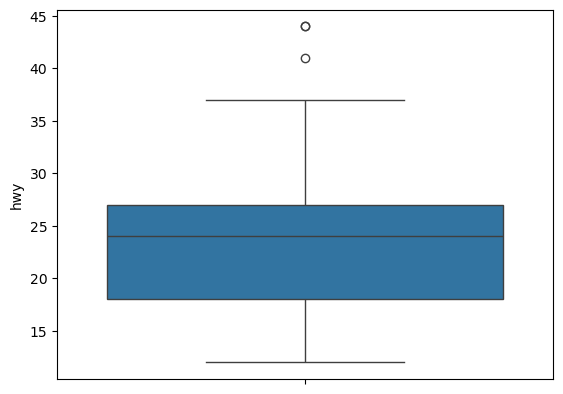

In [95]:
sns.boxplot(data=mpg, y='hwy')

In [97]:
pct25 = mpg['hwy'].quantile(.25)

In [99]:
pct25

18.0

In [101]:
pct75 = mpg['hwy'].quantile(.75)

In [105]:
pct75

27.0

In [107]:
iqr = pct75-pct25 # IQR : 1사분위수와 3사분위수의 거리 

In [109]:
iqr

9.0

In [111]:
pct25-1.5*iqr  #하한 : 1사분위수보다 IQR의 1.5배만큼 더 작은 값

4.5

In [113]:
pct75 + 1.5*iqr  #상한 : 3사분위수보다 IQR의 1.5배만큼 더 큰 값

40.5

In [115]:
#4.5~40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where(
    (mpg['hwy']<4.5) | (mpg['hwy']>40.5),
    np.nan, mpg['hwy']
)

In [117]:
#결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [119]:
#결측치 제거 및 분석
mpg.dropna(subset = 'hwy') \
    .groupby('drv') \
    .agg(mean_why = ('hwy','mean'))
# hwy의 결측치 제거
# drv별로 분리
# drv별로 hwy의 평균 구하기

,mean_why
drv,
4,19.174757
f,27.728155
r,21.000000
